<h1 style="text-align: center;"><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

In [2]:
!gdown --id 1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB
To: /content/cat_dog_data.zip
100% 595M/595M [00:04<00:00, 134MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("cat_dog_data.zip", 'r') as zip:
 # printing all the contents of the zip file 
  #  zip.printdir()
 # extracting all the files 
  #  print('Extracting all the files now...') 
   zip.extractall() 
   print('Done!')

Done!


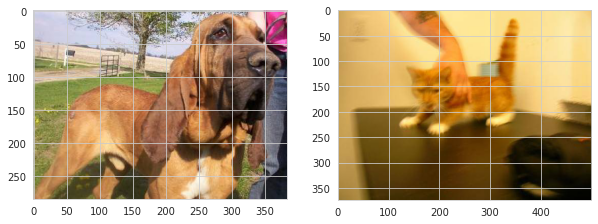

In [5]:
from PIL import Image

plt.subplot(1,2,1)
image = Image.open('data/train/dog/2462.jpg')
plt.imshow(image)
plt.subplot(1,2,2)
image = Image.open('data/train/cat/cat.0.jpg')
plt.imshow(image)

# Data Preprocessing

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
dir_train = 'data/train'
train = tf.keras.utils.image_dataset_from_directory(directory = dir_train,labels='inferred',shuffle=True,
    label_mode='int',batch_size= 32,image_size=(128,128))

dir_validation = 'data/validation'
validation = tf.keras.utils.image_dataset_from_directory(directory = dir_validation,labels='inferred',shuffle=True,
    label_mode='int',batch_size= 32,image_size=(128, 128))

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.


In [7]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


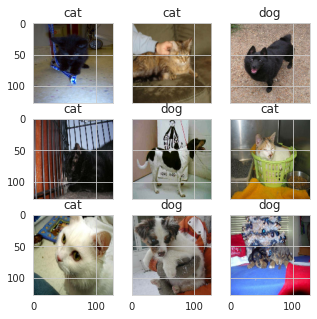

In [8]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5,5))
 
for images, labels in train.take(1):
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(train.class_names[labels[i*3+j]])
plt.show()

# Image Manipulation

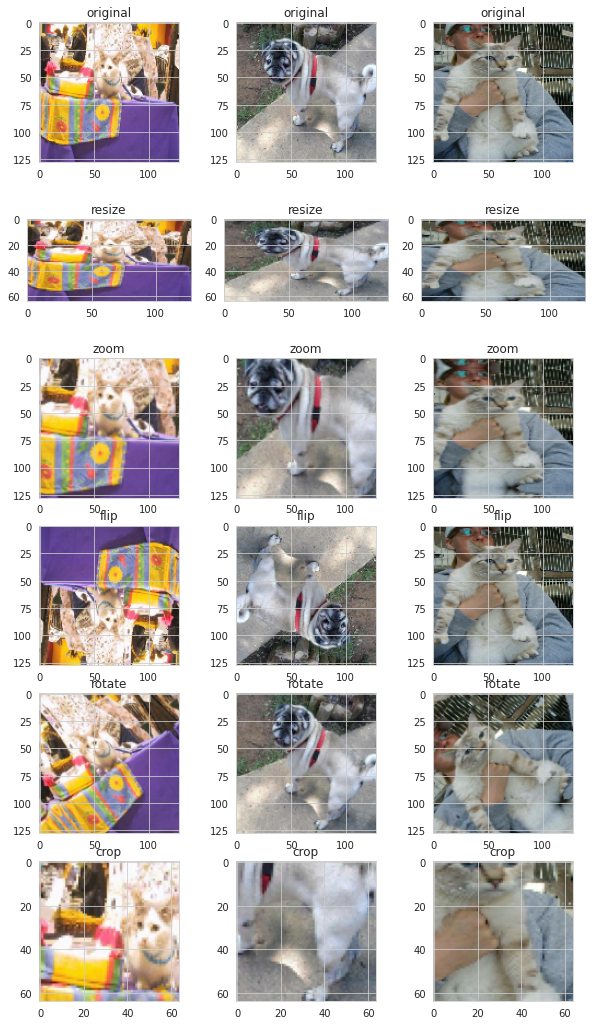

In [9]:
resize = tf.keras.layers.Resizing(64, 128)
zoom = tf.keras.layers.RandomZoom(0.3,0.3)
flip = tf.keras.layers.RandomFlip("horizontal_and_vertical") # or "horizontal", "vertical"
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(64, 64)


fig, ax = plt.subplots(6, 3, figsize=(10,18))
 
for images, labels in train.take(2):
    for i in range(3):
        # original
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # zoom
        ax[2][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("zoom")
        # flip
        ax[3][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("flip")
        # rotate
        ax[4][i].imshow(rotate(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotate")
        # crop
        ax[5][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[5][i].set_title("crop")
      

plt.show()

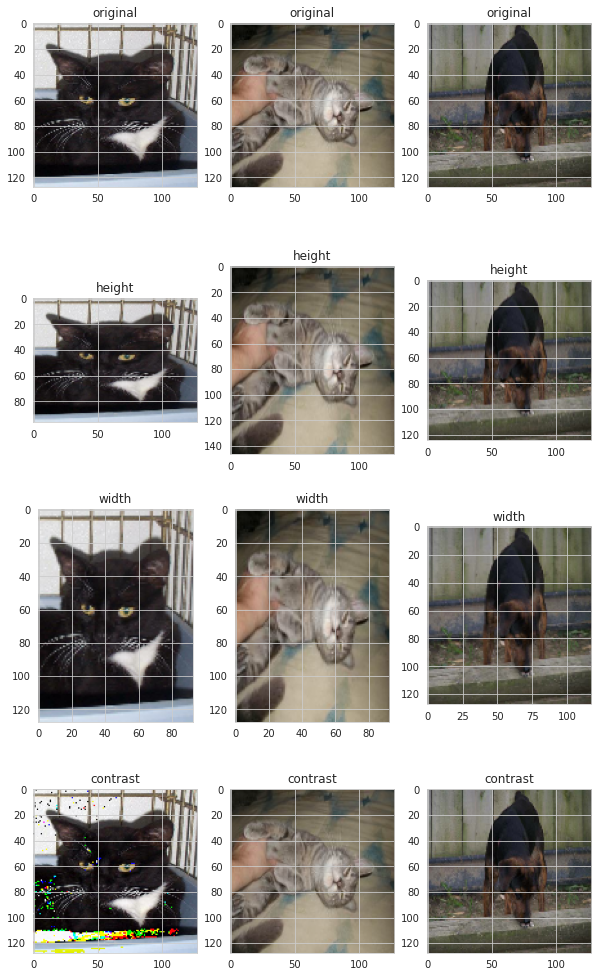

In [10]:
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)# translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
# brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)
 
fig, ax = plt.subplots(4, 3, figsize=(10,18))
 
for images, labels in train.take(2):
    for i in range(3):
        # original
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # height
        ax[1][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("height")
        # width
        ax[2][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("width")
        # contrast
        ax[3][i].imshow(contrast(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("contrast")

      

plt.show()

# Rescaling

In [ ]:
#1. Rescale code
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
# normalized_train = train.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_train))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image)) 

#2. Rescale code
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

# The other one is in the Sequential function we use tf.keras.layers.experimental.preprocessing.Rescaling(1./255).
#   with fit data, it rescaling automatically

# Modelling

# 1st Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, RandomZoom, RandomFlip,RandomRotation,RandomCrop, Resizing, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

dir_train = 'data/train'
train = tf.keras.utils.image_dataset_from_directory(directory = dir_train,labels='inferred', 
                                                    shuffle=True, label_mode='binary',batch_size= 32,image_size=(128, 128))

dir_validation = 'data/validation'
validation = tf.keras.utils.image_dataset_from_directory(directory = dir_validation,labels='inferred', 
                                                         shuffle=True, label_mode='binary',batch_size= 32,image_size=(128, 128))

model1 = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model1.fit(train, epochs=10, validation_data=validation,callbacks=[early_stop])

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.
Epoch 1/10
548/548 [==============================] - 28s 50ms/step - loss: 0.6559 - accuracy: 0.7046 - val_loss: 0.6325 - val_accuracy: 0.6105
Epoch 2/10
548/548 [==============================] - 25s 45ms/step - loss: 0.5461 - accuracy: 0.7420 - val_loss: 1.0971 - val_accuracy: 0.5485
Epoch 3/10
548/548 [==============================] - 25s 45ms/step - loss: 0.5030 - accuracy: 0.7667 - val_loss: 0.6402 - val_accuracy: 0.6913
Epoch 4/10
548/548 [==============================] - 23s 42ms/step - loss: 0.4675 - accuracy: 0.7868 - val_loss: 0.5277 - val_accuracy: 0.7555
Epoch 5/10
548/548 [==============================] - 25s 45ms/step - loss: 0.4317 - accuracy: 0.8067 - val_loss: 0.5134 - val_accuracy: 0.7581
Epoch 6/10
548/548 [==============================] - 29s 51ms/step - loss: 0.3951 - accuracy: 0.8241 - val_loss: 0.5752 - val_accuracy: 0.7454
Epoch 7/10
548/548 [==============================] -

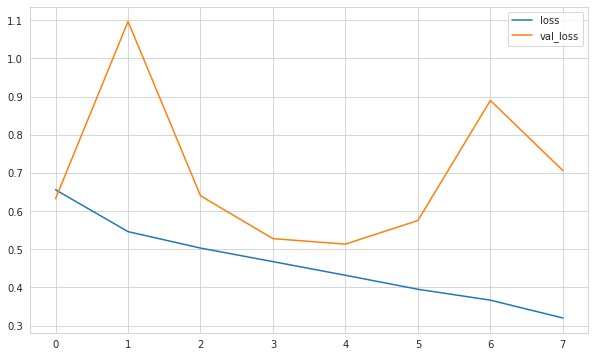

In [23]:
summary = pd.DataFrame(model1.history.history)
summary[["loss", "val_loss"]].plot();



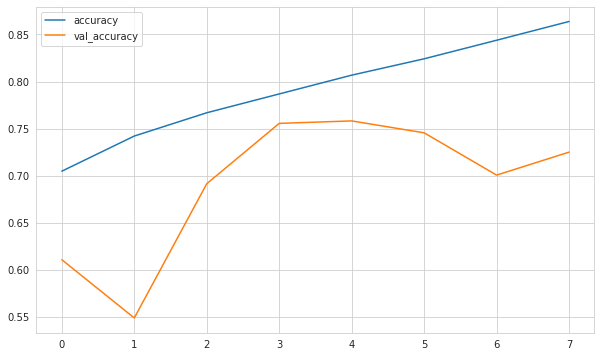

In [24]:
summary[["accuracy", "val_accuracy"]].plot();

# 2nd Model

In [15]:
model2 = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation = "sigmoid"))

model2.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model2.fit(train, epochs=15, validation_data=validation,callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 29s 50ms/step - loss: 0.6335 - accuracy: 0.7109 - val_loss: 0.7367 - val_accuracy: 0.5323
Epoch 2/15
548/548 [==============================] - 24s 43ms/step - loss: 0.5480 - accuracy: 0.7343 - val_loss: 0.6067 - val_accuracy: 0.6808
Epoch 3/15
548/548 [==============================] - 28s 50ms/step - loss: 0.4788 - accuracy: 0.7791 - val_loss: 0.6219 - val_accuracy: 0.6803
Epoch 4/15
548/548 [==============================] - 29s 51ms/step - loss: 0.4335 - accuracy: 0.8041 - val_loss: 0.5288 - val_accuracy: 0.7393
Epoch 5/15
548/548 [==============================] - 23s 42ms/step - loss: 0.3909 - accuracy: 0.8271 - val_loss: 0.5579 - val_accuracy: 0.7253
Epoch 6/15
548/548 [==============================] - 23s 42ms/step - loss: 0.3488 - accuracy: 0.8482 - val_loss: 0.5332 - val_accuracy: 0.7786
Epoch 7/15
548/548 [==============================] - 27s 49ms/step - loss: 0.3010 - accuracy: 0.8711 - val_loss: 0.5620 - val_accuracy:

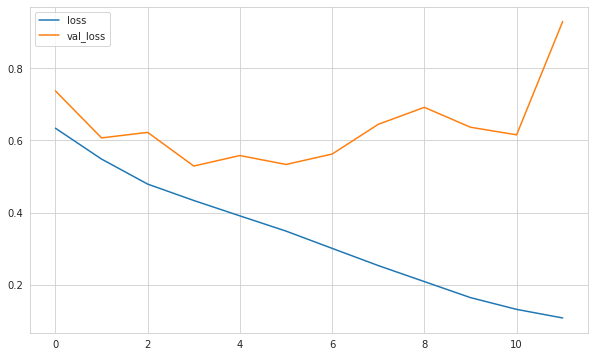

In [26]:
summary2 = pd.DataFrame(model2.history.history)
summary2[["loss", "val_loss"]].plot();

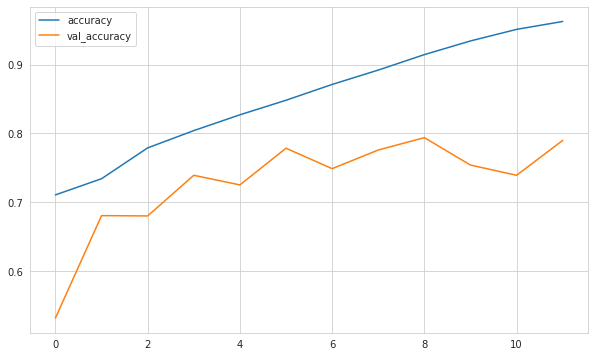

In [27]:
summary2[["accuracy", "val_accuracy"]].plot();

# 3rd Model

In [31]:
from tensorflow.keras.layers import BatchNormalization

model3 = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation = "sigmoid"))

model3.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model3.fit(train, epochs=15, validation_data=validation,callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 30s 53ms/step - loss: 0.9007 - accuracy: 0.6759 - val_loss: 1.7800 - val_accuracy: 0.5323
Epoch 2/15
548/548 [==============================] - 24s 44ms/step - loss: 0.5591 - accuracy: 0.7408 - val_loss: 11.2906 - val_accuracy: 0.5323
Epoch 3/15
548/548 [==============================] - 26s 47ms/step - loss: 0.4528 - accuracy: 0.8045 - val_loss: 2.1380 - val_accuracy: 0.5349
Epoch 4/15
548/548 [==============================] - 31s 56ms/step - loss: 0.3959 - accuracy: 0.8309 - val_loss: 8.5188 - val_accuracy: 0.5336
Epoch 5/15
548/548 [==============================] - 26s 48ms/step - loss: 0.3552 - accuracy: 0.8539 - val_loss: 1.0994 - val_accuracy: 0.6773
Epoch 6/15
548/548 [==============================] - 25s 45ms/step - loss: 0.3049 - accuracy: 0.8764 - val_loss: 5.5593 - val_accuracy: 0.5493
Epoch 7/15
548/548 [==============================] - 24s 44ms/step - loss: 0.2546 - accuracy: 0.9013 - val_loss: 46.7772 - val_accurac

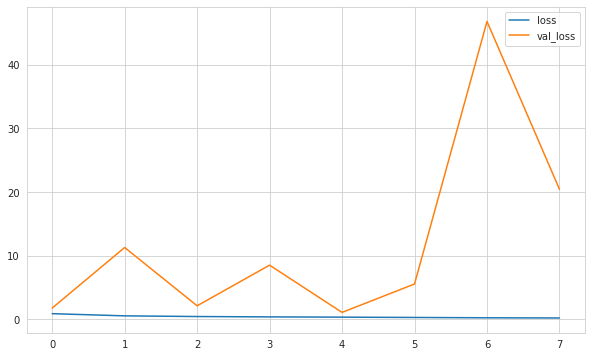

In [32]:
summary3 = pd.DataFrame(model3.history.history)
summary3[["loss", "val_loss"]].plot();

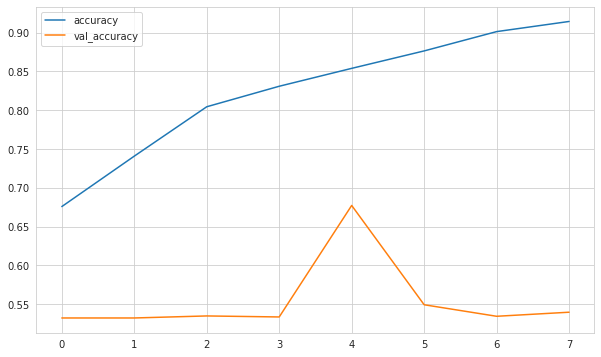

In [33]:
summary3[["accuracy", "val_accuracy"]].plot();

# 4rd Model

In [36]:
model4 = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model4.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1, activation = "sigmoid"))

model4.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model4.fit(train, epochs=15, validation_data=validation,callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 28s 47ms/step - loss: 0.6408 - accuracy: 0.7149 - val_loss: 0.8264 - val_accuracy: 0.5275
Epoch 2/15
548/548 [==============================] - 24s 44ms/step - loss: 0.4947 - accuracy: 0.7746 - val_loss: 3.4679 - val_accuracy: 0.5323
Epoch 3/15
548/548 [==============================] - 25s 45ms/step - loss: 0.4129 - accuracy: 0.8204 - val_loss: 1.6846 - val_accuracy: 0.5332
Epoch 4/15
548/548 [==============================] - 23s 41ms/step - loss: 0.3497 - accuracy: 0.8525 - val_loss: 0.6247 - val_accuracy: 0.7384
Epoch 5/15
548/548 [==============================] - 23s 41ms/step - loss: 0.2884 - accuracy: 0.8815 - val_loss: 1.0586 - val_accuracy: 0.6498
Epoch 6/15
548/548 [==============================] - 24s 43ms/step - loss: 0.2443 - accuracy: 0.9059 - val_loss: 0.7403 - val_accuracy: 0.7428
Epoch 7/15
548/548 [==============================] - 23s 41ms/step - loss: 0.2022 - accuracy: 0.9213 - val_loss: 6.4533 - val_accuracy:

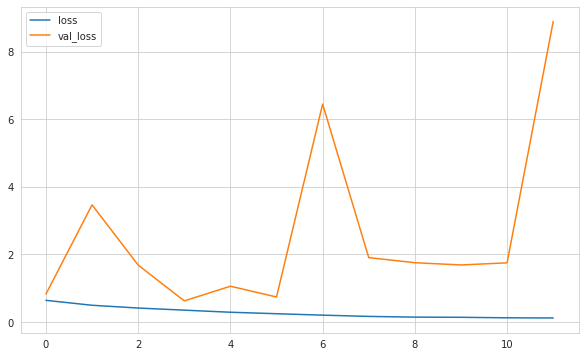

In [41]:
summary4 = pd.DataFrame(model4.history.history)
summary4[["loss", "val_loss"]].plot();

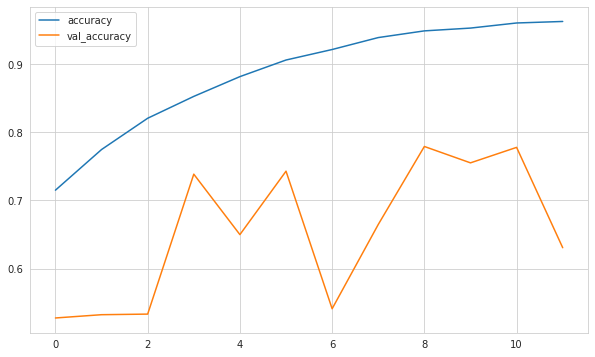

In [42]:
summary4[["accuracy", "val_accuracy"]].plot();

# 5th Model

In [43]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, RandomZoom, RandomFlip,RandomRotation,RandomCrop, Resizing

model5 = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model5.add(RandomFlip("horizontal_and_vertical"))
model5.add(RandomRotation(0.3))
model5.add(RandomZoom(0.3,0.3))

model5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2, 2)))

model5.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2, 2)))

model5.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2, 2)))

model5.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2, 2)))


model5.add(Flatten())

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation = "sigmoid"))

model5.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model5.fit(train, epochs=15, validation_data=validation,callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 26s 43ms/step - loss: 0.6976 - accuracy: 0.6720 - val_loss: 0.9091 - val_accuracy: 0.5341
Epoch 2/15
548/548 [==============================] - 24s 43ms/step - loss: 0.5830 - accuracy: 0.7202 - val_loss: 0.7380 - val_accuracy: 0.5419
Epoch 3/15
548/548 [==============================] - 24s 43ms/step - loss: 0.5227 - accuracy: 0.7523 - val_loss: 0.6941 - val_accuracy: 0.5865
Epoch 4/15
548/548 [==============================] - 24s 43ms/step - loss: 0.5078 - accuracy: 0.7685 - val_loss: 0.7054 - val_accuracy: 0.5437
Epoch 5/15
548/548 [==============================] - 24s 43ms/step - loss: 0.5005 - accuracy: 0.7685 - val_loss: 0.6854 - val_accuracy: 0.5956
Epoch 6/15
548/548 [==============================] - 28s 50ms/step - loss: 0.4922 - accuracy: 0.7743 - val_loss: 1.2052 - val_accuracy: 0.5323
Epoch 7/15
548/548 [==============================] - 25s 45ms/step - loss: 0.5031 - accuracy: 0.7726 - val_loss: 0.6465 - val_accuracy:

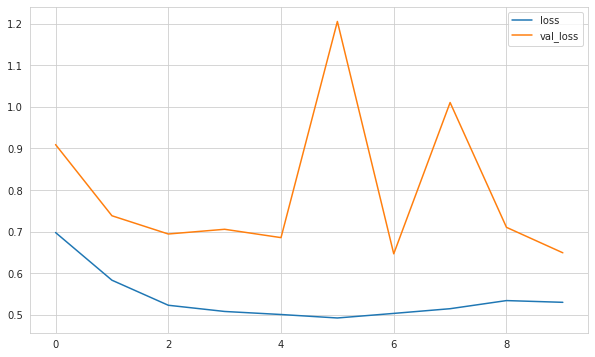

In [44]:
summary5 = pd.DataFrame(model5.history.history)
summary5[["loss", "val_loss"]].plot();

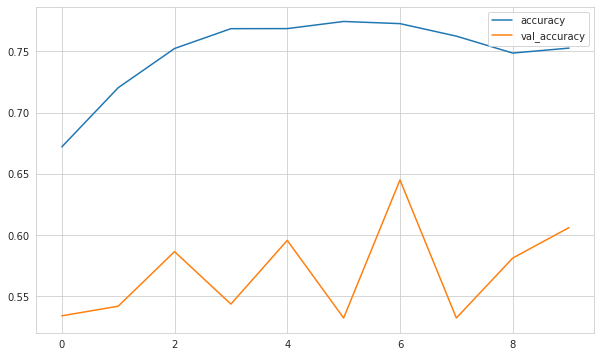

In [45]:
summary5[["accuracy", "val_accuracy"]].plot();

# Final Model

In [46]:
model = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.fit(train, epochs=15, validation_data=validation,callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 25s 43ms/step - loss: 0.5985 - accuracy: 0.7152 - val_loss: 0.6641 - val_accuracy: 0.5913
Epoch 2/15
548/548 [==============================] - 22s 41ms/step - loss: 0.5227 - accuracy: 0.7508 - val_loss: 0.6274 - val_accuracy: 0.6245
Epoch 3/15
548/548 [==============================] - 22s 40ms/step - loss: 0.4628 - accuracy: 0.7855 - val_loss: 0.6418 - val_accuracy: 0.6921
Epoch 4/15
548/548 [==============================] - 22s 40ms/step - loss: 0.4148 - accuracy: 0.8135 - val_loss: 0.4898 - val_accuracy: 0.7725
Epoch 5/15
548/548 [==============================] - 22s 41ms/step - loss: 0.3771 - accuracy: 0.8327 - val_loss: 0.5595 - val_accuracy: 0.7493
Epoch 6/15
548/548 [==============================] - 22s 40ms/step - loss: 0.3391 - accuracy: 0.8511 - val_loss: 0.4206 - val_accuracy: 0.8197
Epoch 7/15
548/548 [==============================] - 22s 40ms/step - loss: 0.3021 - accuracy: 0.8688 - val_loss: 0.7108 - val_accuracy:

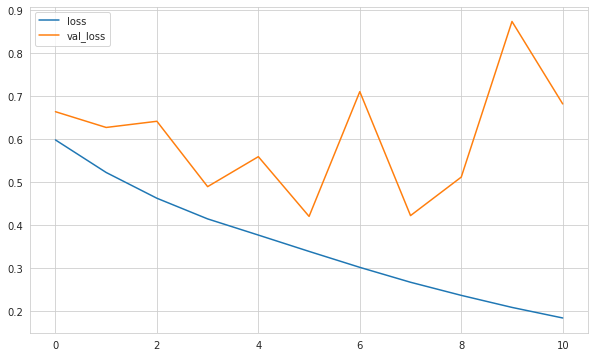

In [47]:
summary_final = pd.DataFrame(model.history.history)
summary_final[["loss", "val_loss"]].plot();

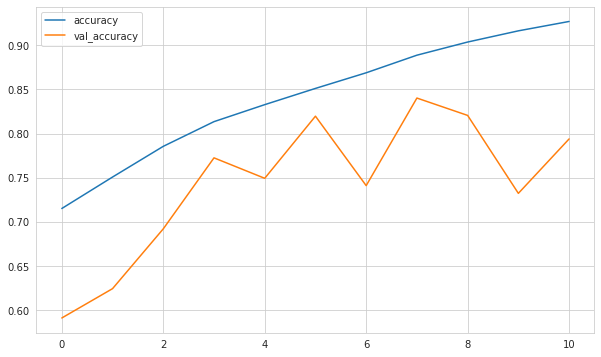

In [48]:
summary_final[["accuracy", "val_accuracy"]].plot();

In [49]:
score = model.evaluate(validation)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 2s 29ms/step - loss: 0.4224 - accuracy: 0.8402
Test loss: 0.42243054509162903
Test accuracy: 0.840174674987793


In [55]:
dir_validation = 'data/validation'
validation = tf.keras.utils.image_dataset_from_directory(directory = dir_validation,labels='inferred',
    label_mode='binary',batch_size= 32,image_size=(128, 128), shuffle=False)
label = np.concatenate([label for x, label in validation], axis=0)
label

Found 2290 files belonging to 2 classes.


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [53]:
validation

<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [56]:
# label = np.concatenate([label for x, label in validation], axis=0)
pred_probabilities = model.predict(validation)
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(label,predictions))
print(classification_report(label,predictions))


[[1046  173]
 [ 193  878]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1219
         1.0       0.84      0.82      0.83      1071

    accuracy                           0.84      2290
   macro avg       0.84      0.84      0.84      2290
weighted avg       0.84      0.84      0.84      2290



In [58]:
from tensorflow.keras.models import load_model
model.save('cat_dog_cnn1.h5',)

# Image Prediction

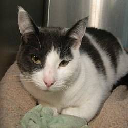

In [66]:
from PIL import Image
from tensorflow.keras.preprocessing import image

model2 = load_model('cat_dog_cnn1.h5')

img = image.load_img("data/test/10005.jpg", target_size=(128,128,3)) 
img   

In [67]:
img_array = np.array(img) 
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 128, 128, 3)

In [68]:
model.predict(img_array) > 0.5

array([[False]])

In [69]:
validation.class_names

['cat', 'dog']